# We rate dogs data analysis

In [1]:
import os
import pandas as pd
import requests

# Libraries for visualizations
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
%matplotlib inline
import seaborn as sns
sns.set_theme(style='white', palette='Set2')
fav_color = '#33b5e5'
#-------------------------------------------#

import json
import os
#import tweepy
import numpy as np
from functools import reduce
import urllib.request as urllib2
import re

# Do not truncate data in cells
pd.set_option('display.max_colwidth', None)

# Do not limit number of displayed columns
pd.set_option('display.max_columns', None)

# Display floats with 2 decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)

In [2]:
#Load twitter-archive-enhanced CSV
df_twitter_arch = pd.read_csv('data/twitter-archive-enhanced.csv')
#df.head()

In [3]:
#Download file image-predictions and write in our data folder
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#response.content
with open(os.path.join("data",url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
       

In [4]:
#Load image-predictions file then check the head()
df_image_prd = pd.read_csv('data/image-predictions.tsv',sep='\t')


In [5]:
#Load the text file jason format and check the head
with open('data/tweet_json.txt') as file:
    df_json_tweet = pd.read_json(file, lines= True, encoding = 'utf-8')


# Assesing data

In [6]:
#Asseing df_twitter_arch
df_twitter_arch.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1113  733109485275860992                    nan                  nan   
460   817777686764523521                    nan                  nan   
720   783347506784731136                    nan                  nan   
1670  682406705142087680                    nan                  nan   
1850  675740360753160193                    nan                  nan   

                      timestamp  \
1113  2016-05-19 01:38:16 +0000   
460   2017-01-07 16:59:28 +0000   
720   2016-10-04 16:46:14 +0000   
1670  2015-12-31 03:43:31 +0000   
1850  2015-12-12 18:13:51 +0000   

                                                                                  source  \
1113  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
460   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
720   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1670  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1850  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                      text  \
1113                                                                                            Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda   
460   This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7   
720                                                            RT @dog_rates: This is Kenny. He just wants to be included in the happenings. 11/10 https://t.co/2S6oye3XqK   
1670                                                                                                   This is Patrick. He's a bigass pupper. 7/10 https://t.co/J9DXBFoAQe   
1850                                                                                    Here's a pupper licking in slow motion. 12/10 please enjoy https://t.co/AUJi8ujxw9   

            retweeted_status_id  retweeted_status_user_id  \
1113                        nan                       nan   
460                         nan                       nan   
720  674,291,837,063,053,312.00          4,196,983,835.00   
1670                        nan                       nan   
1850                        nan                       nan   

     retweeted_status_timestamp  \
1113                        NaN   
460                         NaN   
720   2015-12-08 18:17:56 +0000   
1670                        NaN   
1850                        NaN   

                                                                                                                        expanded_urls  \
1113                                                                  https://twitter.com/dog_rates/status/733109485275860992/photo/1   
460                                                                   https://twitter.com/dog_rates/status/817777686764523521/video/1   
720   https://twitter.com/dog_rates/status/674291837063053312/photo/1,https://twitter.com/dog_rates/status/674291837063053312/photo/1   
1670                                                                  https://twitter.com/dog_rates/status/682406705142087680/photo/1   
1850                                                                  https://twitter.com/dog_rates/status/675740360753160193/video/1   

      rating_numerator  rating_denominator     name  doggo floofer  pupper  \
1113                12                  10     None  doggo    None  pupper   
460                 13                  10     Dido  doggo    None  pupper   
720                 11                  10    Kenny   None    None    None   
1670                 7                  10  Patrick   None   

In [7]:
#Asseing df_image_prd
df_image_prd.sample(5)

tweet_id                                          jpg_url  \
210   669993076832759809  https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg   
1122  726935089318363137  https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg   
1821  834574053763584002  https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg   
1409  770414278348247044  https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg   
573   678424312106393600  https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg   

      img_num             p1              p1_conf  p1_dog                p2  \
210         1     piggy_bank                 0.18   False        hair_spray   
1122        2          teddy                 0.82   False        toy_poodle   
1821        1  toilet_tissue                 0.26   False  golden_retriever   
1409        1        maillot                 0.58   False           maillot   
573         1    Maltese_dog                 0.76    True        toy_poodle   

                  p2_conf  p2_dog                p3              p3_conf  \
210                  0.10   False        toy_poodle                 0.09   
1122                 0.08    True  Lakeland_terrier                 0.03   
1821                 0.23    True           bathtub                 0.08   
1409                 0.08   False  golden_retriever                 0.05   
573                  0.10    True          Shih-Tzu                 0.06   

      p3_dog  
210     True  
1122    True  
1821   False  
1409    True  
573     True

In [8]:
df_image_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_image_prd.describe()

tweet_id              img_num              p1_conf  \
count                   2,075.00             2,075.00             2,075.00   
mean  738,451,357,852,539,008.00                 1.20                 0.59   
std    67,852,033,330,235,656.00                 0.56                 0.27   
min   666,020,888,022,790,144.00                 1.00                 0.04   
25%   676,483,507,139,540,992.00                 1.00                 0.36   
50%   711,998,809,858,043,904.00                 1.00                 0.59   
75%   793,203,448,525,178,880.00                 1.00                 0.84   
max   892,420,643,555,336,192.00                 4.00                 1.00   

                   p2_conf              p3_conf  
count             2,075.00             2,075.00  
mean                  0.13                 0.06  
std                   0.10                 0.05  
min                   0.00                 0.00  
25%                   0.05                 0.02  
50%                   0.12                 0.05  
75%                   0.20                 0.09  
max                   0.49                 0.27

In [10]:
df_image_prd.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [11]:
df_image_prd.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
American_black_bear      1
long-horned_beetle       1
shopping_basket          1
coho                     1
soccer_ball              1
Name: p1, Length: 378, dtype: int64

In [12]:
df_image_prd.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hummingbird             1
pier                    1
hyena                   1
platypus                1
bannister               1
Name: p2, Length: 405, dtype: int64

In [13]:
df_image_prd.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
plastic_bag            1
African_grey           1
stinkhorn              1
maraca                 1
bannister              1
Name: p3, Length: 408, dtype: int64

In [14]:
df_image_prd.query("p1_dog == False and p2_dog == False and p3_dog == False")

tweet_id  \
6     666051853826850816   
17    666104133288665088   
18    666268910803644416   
21    666293911632134144   
25    666362758909284353   
...                  ...   
2021  880935762899988482   
2022  881268444196462592   
2046  886680336477933568   
2052  887517139158093824   
2074  892420643555336193   

                                                                                      jpg_url  \
6                                             https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17                                            https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18                                            https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21                                            https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25                                            https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                                                                                       ...   
2021                                          https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022                                          https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046                                          https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg   
2074                                          https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1              p1_conf  p1_dog               p2  \
6           1        box_turtle                 0.93   False       mud_turtle   
17          1               hen                 0.97   False             cock   
18          1  desktop_computer                 0.09   False             desk   
21          1  three-toed_sloth                 0.91   False            otter   
25          1        guinea_pig                 1.00   False            skunk   
...       ...               ...                  ...     ...              ...   
2021        1       street_sign                 0.25   False         umbrella   
2022        1            tusker                 0.47   False  Indian_elephant   
2046        1       convertible                 0.74   False       sports_car   
2052        1         limousine                 0.13   False        tow_truck   
2074        1            orange                 0.10   False            bagel   

                  p2_conf  p2_dog              p3              p3_conf  p3_dog  
6                    0.05   False        terrapin                 0.02   False  
17                   0.03   False       partridge                 0.00   False  
18                   0.09   False        bookcase                 0.08   False  
21                   0.02   False  great_grey_owl                 0.01   False  
25                   0.00   False         hamster                 0.00   False  
...                   ...     ...             ...                  ...     ...  
2021                 0.12   False   traffic_light                 0.07   False  
2022                 0.25   False            ibex                 0.06   False  
2046                 0.14   False       car_wheel                 0.04   False  
2052                 0.03   False   shopping_cart                 0.03   False  
2074                 0.09   False          banana                 0.08   False  

[324 rows x 12 columns]

In [15]:
# Number of images not predicted as dogs from the 3 models
df_image_prd.query("p1_dog == False and p2_dog == False and p3_dog == False").shape[0]

324

In [16]:
df_twitter_arch.sample(5)

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
1446  696490539101908992 696,488,710,901,260,288.00     4,196,983,835.00   
1649  683742671509258241                        nan                  nan   
438   820013781606658049                        nan                  nan   
38    884925521741709313                        nan                  nan   
889   759793422261743616                        nan                  nan   

                      timestamp  \
1446  2016-02-08 00:27:39 +0000   
1649  2016-01-03 20:12:10 +0000   
438   2017-01-13 21:04:55 +0000   
38    2017-07-12 00:01:00 +0000   
889   2016-07-31 16:50:42 +0000   

                                                                                  source  \
1446  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1649  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
438   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
38    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
889   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                  text  \
1446                                             After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me   
1649         Meet Sebastian. He's a womanizer. Romantic af. Always covered in flower petals. Also a poet. 11/10 dreamy as hell https://t.co/eoL1bCpWCg   
438    RT @dog_rates: This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://…   
38                               This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl https://t.co/MYJvdlNRVa   
889   Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll   

            retweeted_status_id  retweeted_status_user_id  \
1446                        nan                       nan   
1649                        nan                       nan   
438  819,952,236,453,363,712.00          4,196,983,835.00   
38                          nan                       nan   
889                         nan                       nan   

     retweeted_status_timestamp  \
1446                        NaN   
1649                        NaN   
438   2017-01-13 17:00:21 +0000   
38                          NaN   
889                         NaN   

                                                                                                                        expanded_urls  \
1446                                                                                                                              NaN   
1649                                                                  https://twitter.com/dog_rates/status/683742671509258241/photo/1   
438                         https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1   
38                                                                    https://twitter.com/dog_rates/status/884925521741709313/photo/1   
889   https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1   

      rating_numerator  rating_denominator       name  doggo floofer  pupper  \
1446                 1                  10       None   None    None    None   
1649                11                  10  Sebastian   None    None    None   
438                 13                  10     Oliver   None    None    None   
38                  12                  10       Earl   None    None    None   
889                 12                  10     Maggie  doggo    None 

In [17]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df_twitter_arch.describe()

tweet_id      in_reply_to_status_id  \
count                   2,356.00                      78.00   
mean  742,771,590,321,719,808.00 745,507,917,855,750,656.00   
std    68,567,047,444,761,032.00  75,824,920,044,192,880.00   
min   666,020,888,022,790,144.00 665,814,696,700,723,200.00   
25%   678,398,938,214,475,776.00 675,741,911,993,464,832.00   
50%   719,627,934,716,235,776.00 703,870,840,226,598,912.00   
75%   799,337,304,954,252,288.00 825,780,371,286,566,912.00   
max   892,420,643,555,336,192.00 886,266,357,075,128,320.00   

             in_reply_to_user_id        retweeted_status_id  \
count                      78.00                     181.00   
mean   20,141,706,360,873,208.00 772,039,961,038,007,040.00   
std   125,279,666,255,236,320.00  62,369,278,105,055,600.00   
min                11,856,342.00 666,104,133,288,665,088.00   
25%               308,637,448.75 718,631,497,683,582,976.00   
50%             4,196,983,835.00 780,465,709,297,995,776.00   
75%             4,196,983,835.00 820,314,633,777,061,888.00   
max   840,547,864,354,918,400.00 887,473,957,103,951,872.00   

        retweeted_status_user_id     rating_numerator   rating_denominator  
count                     181.00             2,356.00             2,356.00  
mean   12,416,983,653,017,580.00                13.13                10.46  
std    95,992,535,331,517,536.00                45.88                 6.75  
min                   783,214.00                 0.00                 0.00  
25%             4,196,983,835.00                10.00                10.00  
50%             4,196,983,835.00                11.00                10.00  
75%             4,196,983,835.00                12.00                10.00  
max   787,461,778,435,289,088.00             1,776.00               170.00

In [19]:
df_twitter_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [20]:
df_twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df_twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [22]:
df_twitter_arch.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tom          1
Tedrick      1
Acro         1
my           1
Rooney       1
Name: name, Length: 957, dtype: int64

In [23]:
df_twitter_arch[~df_twitter_arch.name.str.istitle()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22    887517139158093824                    nan                  nan   
56    881536004380872706                    nan                  nan   
118   869988702071779329                    nan                  nan   
169   859196978902773760                    nan                  nan   
193   855459453768019968                    nan                  nan   
...                  ...                    ...                  ...   
2349  666051853826850816                    nan                  nan   
2350  666050758794694657                    nan                  nan   
2352  666044226329800704                    nan                  nan   
2353  666033412701032449                    nan                  nan   
2354  666029285002620928                    nan                  nan   

                      timestamp  \
22    2017-07-19 03:39:09 +0000   
56    2017-07-02 15:32:16 +0000   
118   2017-05-31 18:47:24 +0000   
169   2017-05-02 00:04:57 +0000   
193   2017-04-21 16:33:22 +0000   
...                         ...   
2349  2015-11-16 00:35:11 +0000   
2350  2015-11-16 00:30:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   

                                                                                  source  \
22    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
56    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
118   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
169   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
193   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2349  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2350  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
22                                  I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba   
56           Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF   
118                         RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…   
169                 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9   
193   Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x   
...                                                                                                                                                                  ...   
2349                          This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc   
2350                        This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe   
2352                           This is a purebred Piers Morgan. Loves to Netf

In [24]:
df_twitter_arch[~df_twitter_arch.name.str.istitle()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
actually         2
getting          2
mad              2
CeCe             2
not              2
his              1
JD               1
incredibly       1
this             1
such             1
space            1
DayZ             1
DonDon           1
old              1
officially       1
life             1
light            1
by               1
my               1
BeBe             1
all              1
infuriating      1
unacceptable     1
Name: name, dtype: int64

In [25]:
df_twitter_arch[~df_twitter_arch.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [26]:
df_twitter_arch.query("rating_numerator < 10 or rating_numerator > 100 or rating_denominator != 10")

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                        nan                  nan   
188   855862651834028034 855,861,584,463,351,808.00       194,351,775.00   
189   855860136149123072 855,858,535,607,001,088.00        13,615,722.00   
229   848212111729840128                        nan                  nan   
290   838150277551247360 838,145,498,691,194,880.00        21,955,058.00   
...                  ...                        ...                  ...   
2351  666049248165822465                        nan                  nan   
2352  666044226329800704                        nan                  nan   
2353  666033412701032449                        nan                  nan   
2354  666029285002620928                        nan                  nan   
2355  666020888022790149                        nan                  nan   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
229   2017-04-01 16:35:01 +0000   
290   2017-03-04 22:12:52 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
45    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
188   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
189   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
229   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
290   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
45                              This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
188                                                                               @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
229   This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1   
290                                                                                                                                                   @markhoppus 182/10   
...                                                                                                                                                                  ...   
2351                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353                         

In [27]:
df_twitter_arch.query("rating_numerator < 10")

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                        nan                  nan   
229   848212111729840128                        nan                  nan   
315   835152434251116546                        nan                  nan   
387   826598799820865537 826,598,365,270,007,808.00     4,196,983,835.00   
462   817502432452313088                        nan                  nan   
...                  ...                        ...                  ...   
2351  666049248165822465                        nan                  nan   
2352  666044226329800704                        nan                  nan   
2353  666033412701032449                        nan                  nan   
2354  666029285002620928                        nan                  nan   
2355  666020888022790149                        nan                  nan   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
229   2017-04-01 16:35:01 +0000   
315   2017-02-24 15:40:31 +0000   
387   2017-02-01 01:11:25 +0000   
462   2017-01-06 22:45:43 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
45    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
229   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
315   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
387   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
462   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
45                              This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
229   This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1   
315                                                    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag   
387                                                                                                I was going to do 007/10, but the joke wasn't worth the &lt;10 rating   
462                         RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…   
...                                                                                                                                                                  ...   
2351                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353                         

In [28]:
df_twitter_arch.query("rating_numerator <= 5")

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                    nan                  nan   
315   835152434251116546                    nan                  nan   
605   798576900688019456                    nan                  nan   
730   781661882474196992                    nan                  nan   
765   777885040357281792                    nan                  nan   
...                  ...                    ...                  ...   
2334  666293911632134144                    nan                  nan   
2335  666287406224695296                    nan                  nan   
2338  666104133288665088                    nan                  nan   
2349  666051853826850816                    nan                  nan   
2351  666049248165822465                    nan                  nan   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
315   2017-02-24 15:40:31 +0000   
605   2016-11-15 17:22:24 +0000   
730   2016-09-30 01:08:10 +0000   
765   2016-09-19 15:00:20 +0000   
...                         ...   
2334  2015-11-16 16:37:02 +0000   
2335  2015-11-16 16:11:11 +0000   
2338  2015-11-16 04:02:55 +0000   
2349  2015-11-16 00:35:11 +0000   
2351  2015-11-16 00:24:50 +0000   

                                                                                  source  \
45    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
315   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
605   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
730   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
765   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2334  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2338  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2349  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                              text  \
45        This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
315                              When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag   
605   RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…   
730                     Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC   
765   This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M   
...                                                                                                                                            ...   
2334    This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0   
2335      This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   
2338        Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX   
2349    This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 ht

In [29]:
df_twitter_arch.query("rating_denominator != 10")

tweet_id      in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640 835,245,984,028,504,064.00        26,259,576.00   
342   832088576586297345 832,087,547,559,997,440.00        30,582,082.00   
433   820690176645140481                        nan                  nan   
516   810984652412424192                        nan                  nan   
784   775096608509886464                        nan                  nan   
902   758467244762497024                        nan                  nan   
1068  740373189193256964                        nan                  nan   
1120  731156023742988288                        nan                  nan   
1165  722974582966214656                        nan                  nan   
1202  716439118184652801                        nan                  nan   
1228  713900603437621249                        nan                  nan   
1254  710658690886586372                        nan                  nan   
1274  709198395643068416                        nan                  nan   
1351  704054845121142784                        nan                  nan   
1433  697463031882764288                        nan                  nan   
1598  686035780142297088 686,034,024,800,862,208.00     4,196,983,835.00   
1634  684225744407494656 684,222,868,335,505,408.00     4,196,983,835.00   
1635  684222868335505415                        nan                  nan   
1662  682962037429899265                        nan                  nan   
1663  682808988178739200 682,788,441,537,560,576.00     4,196,983,835.00   
1779  677716515794329600                        nan                  nan   
1843  675853064436391936                        nan                  nan   
2335  666287406224695296                        nan                  nan   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                                                  source  \
313   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
433   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
516   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
784   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
902   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1202  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1351  <a href="http://twitter.com/download/iphone" rel="nofoll

In [30]:
df_json_tweet

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                                                                                                                                               full_text  \
0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2349                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2350                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2351                                  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
2352                         This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2353                                 Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   

      truncated display_text_range  \
0         False            [0, 85]   
1         False           [0, 138]   
2         False           [0, 121]   
3         False            [0, 79]   
4         False           [0, 138]   
...         ...                ...   
2349      False           [0, 120]   
2350      False           [0, 137]   
2351      False           [0, 130]   
2352      False           [0, 139]   
2353      False           [0, 131]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [31]:
df_json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [32]:
df_json_tweet.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [33]:
df_json_tweet.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
es        1
eu        1
et        1
ro        1
Name: lang, dtype: int64

In [34]:
df_json_tweet.describe()

id                     id_str  \
count                   2,354.00                   2,354.00   
mean  742,697,816,435,063,552.00 742,697,816,435,063,552.00   
std    68,528,120,712,910,648.00  68,528,120,712,910,648.00   
min   666,020,888,022,790,144.00 666,020,888,022,790,144.00   
25%   678,397,510,244,808,704.00 678,397,510,244,808,704.00   
50%   719,459,571,111,233,536.00 719,459,571,111,233,536.00   
75%   799,305,849,241,918,464.00 799,305,849,241,918,464.00   
max   892,420,643,555,336,192.00 892,420,643,555,336,192.00   

           in_reply_to_status_id  in_reply_to_status_id_str  \
count                      78.00                      78.00   
mean  745,507,917,855,750,656.00 745,507,917,855,750,656.00   
std    75,824,920,044,192,880.00  75,824,920,044,192,880.00   
min   665,814,696,700,723,200.00 665,814,696,700,723,200.00   
25%   675,741,911,993,464,832.00 675,741,911,993,464,832.00   
50%   703,870,840,226,598,912.00 703,870,840,226,598,912.00   
75%   825,780,371,286,566,912.00 825,780,371,286,566,912.00   
max   886,266,357,075,128,320.00 886,266,357,075,128,320.00   

             in_reply_to_user_id    in_reply_to_user_id_str  \
count                      78.00                      78.00   
mean   20,141,706,360,873,208.00  20,141,706,360,873,208.00   
std   125,279,666,255,236,320.00 125,279,666,255,236,320.00   
min                11,856,342.00              11,856,342.00   
25%               308,637,448.75             308,637,448.75   
50%             4,196,983,835.00           4,196,983,835.00   
75%             4,196,983,835.00           4,196,983,835.00   
max   840,547,864,354,918,400.00 840,547,864,354,918,400.00   

                       geo          coordinates         contributors  \
count                 0.00                 0.00                 0.00   
mean                   nan                  nan                  nan   
std                    nan                  nan                  nan   
min                    nan                  nan                  nan   
25%                    nan                  nan                  nan   
50%                    nan                  nan                  nan   
75%                    nan                  nan                  nan   
max                    nan                  nan                  nan   

             retweet_count       favorite_count   possibly_sensitive  \
count             2,354.00             2,354.00             2,211.00   
mean              3,164.80             8,080.97                 0.00   
std               5,284.77            11,814.77                 0.00   
min                   0.00                 0.00                 0.00   
25%                 624.50             1,415.00                 0.00   
50%               1,473.50             3,603.50                 0.00   
75%               3,652.00            10,122.25                 0.00   
max              79,515.00           132,810.00                 0.00   

       possibly_sensitive_appealable           quoted_status_id  \
count                       2,211.00                      29.00   
mean                            0.00 816,268,554,633,332,608.00   
std                             0.00  61,641,605,265,675,568.00   
min                             0.00 672,108,316,018,024,448.00   
25%                             0.00 788,818,328,538,099,712.00   
50%                             0.00 834,086,676,934,836,224.00   
75%                             0.00 866,458,718,883,467,264.00   
max                             0.00 886,053,434,075,471,872.00   

            quoted_status_id_str  
count                      29.00  
mean  816,268,554,633,332,608.00  
std    61,641,605,265,675,568.00  
min   672,108,316,018,024,448.00  
25%   788,818,328,538,099,712.00  
50%   834,086,676,934,836,224.00  
75%   866,458,718,883,467,264.00  
max   886,053,434,075,471,872.00

<AxesSubplot:>

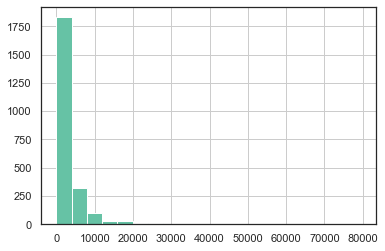

In [35]:
df_json_tweet.retweet_count.hist(bins=20)

<AxesSubplot:>

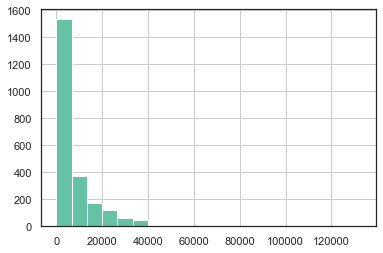

In [36]:
df_json_tweet.favorite_count.hist(bins=20)

In [37]:
df_json_tweet[['retweet_count', 'favorite_count']].describe()

retweet_count       favorite_count
count             2,354.00             2,354.00
mean              3,164.80             8,080.97
std               5,284.77            11,814.77
min                   0.00                 0.00
25%                 624.50             1,415.00
50%               1,473.50             3,603.50
75%               3,652.00            10,122.25
max              79,515.00           132,810.00

In [38]:
#get the number of images with invalid dog data
models_not_dogs = list(df_image_prd.query('p1_dog == False and p2_dog == False and p3_dog == False')['jpg_url'].sample(49))
len(models_not_dogs)

49

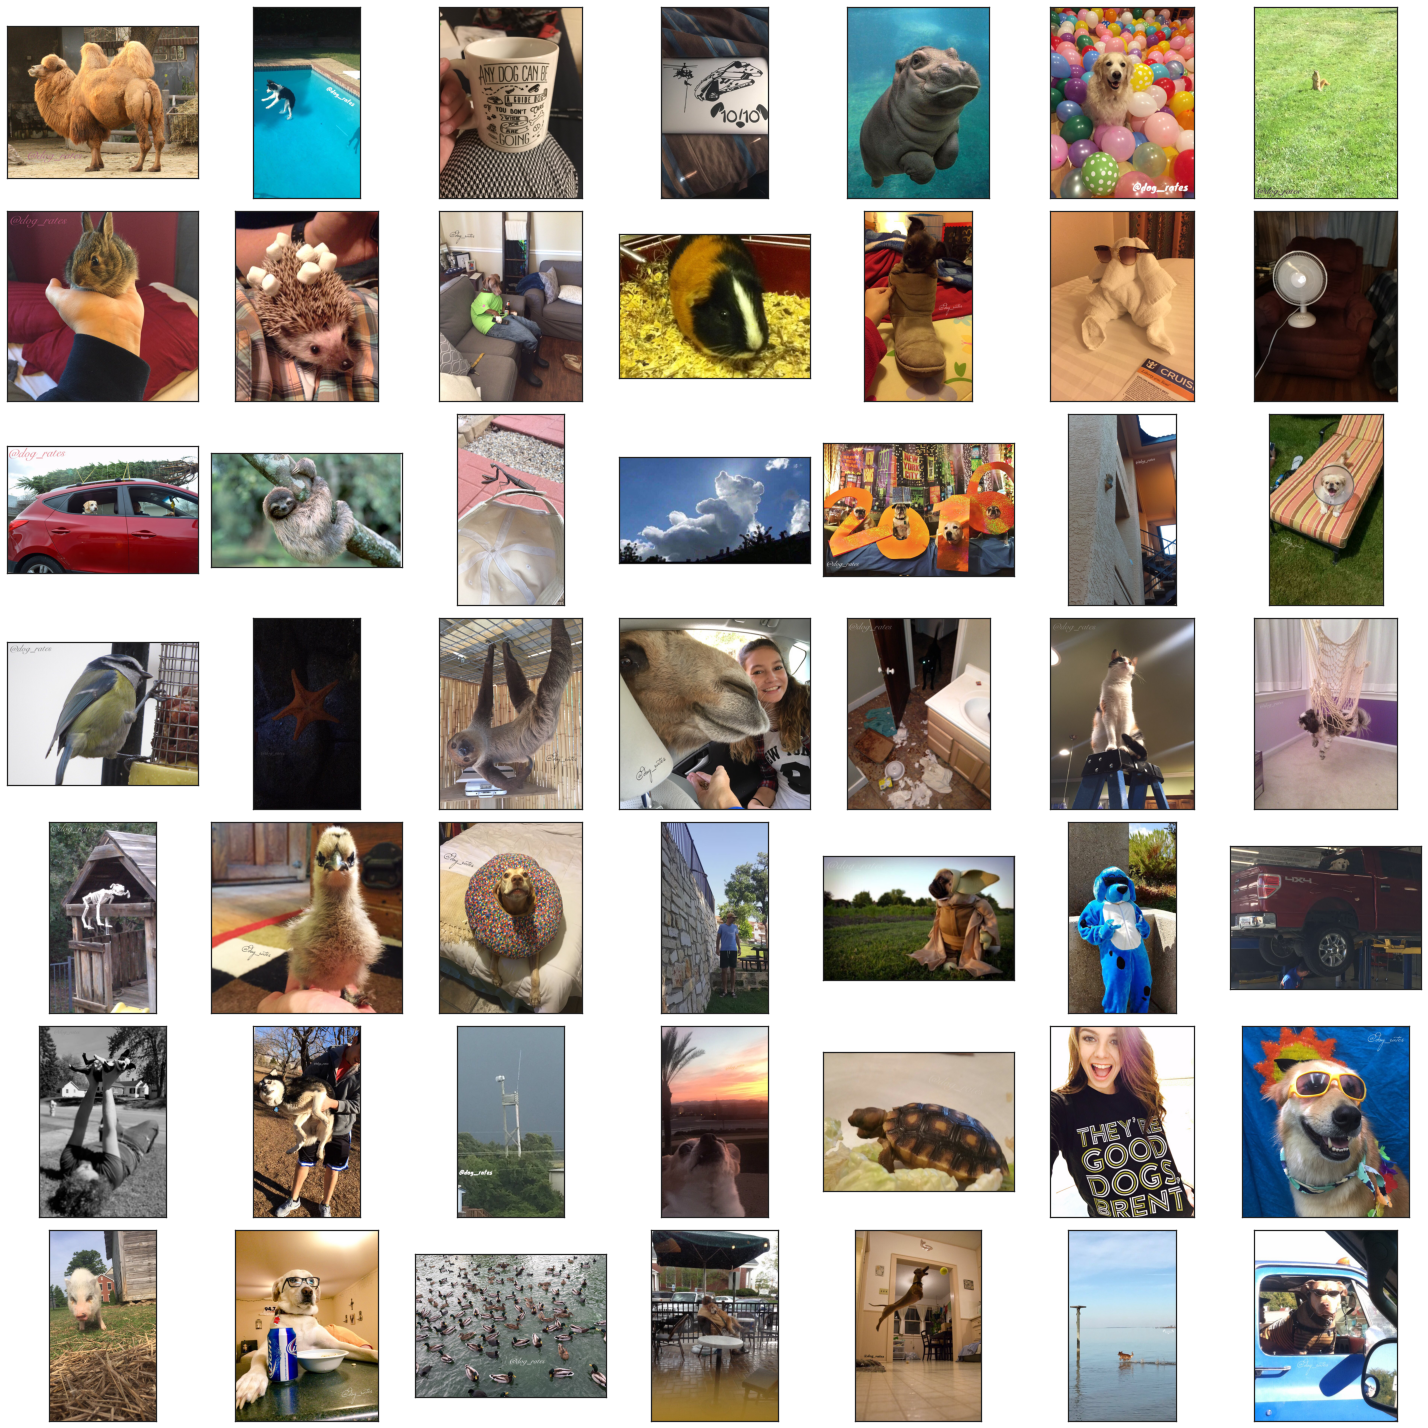

In [39]:
#Display the invalid dog images
fig, axis = plt.subplots(figsize=(20, 20), nrows=7, ncols=7, tight_layout=True)
axis = axis.flatten()
for i, ax in enumerate(axis):
    img_url = models_not_dogs[i]
    img = imread(img_url, format='jpg')
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])

## Observations

### Quality Issues

**df_image_prd**

- "img_num" unnesseccary column.

**df_twitter_arch**

- "Souce" Column has the html tag included
- Rows for Retweets and replies need to be removed
- "name" column has wrong names like (
       'such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ)
- "name" column has None for missing values instead of nans.
- "timestamp" column dtype is str instead of datetime64.
- "rating numerators" has wrong values taking the value after "." instead of the whole number.
- Some images are rated low for images of animals other than dogs.
- "rating denominator" has values other than 10 for picture of group of dogs and wrong values.
- 'doggo', 'floofer', 'pupper', 'puppo' has None instead of nans

**df_json_tweet**

- Only ('lang', 'retweet_count', 'favorite_count') are needed for my analysis.

### Tidiness Issues

**df_image_prd**

- ('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') we need to select the data for best model out the 3 models.


**df_twitter_arch**

- 'doggo', 'floofer', 'pupper', 'puppo' 4 columns for only one variable

**All 3 datastes need to be joined in one dataset**

## Cleaninig

In [40]:
#take a copy from the 3 data frames
df_twitter_arch_cleaned = df_twitter_arch.copy()
df_image_prd_cleaned = df_image_prd.copy()
df_json_tweet_cleaned = df_json_tweet.copy()

### Define
First we start by merging out data into one big dataset

### Code

In [41]:
# list to hold 
dfs = [df_twitter_arch_cleaned, df_image_prd_cleaned, df_json_tweet_cleaned]

In [42]:
# rename tweet id to id
df_json_tweet_cleaned.rename(columns={'id': 'tweet_id'}, inplace=True)

In [43]:
#Merge the three data set into one 
df_master = reduce(lambda left, right: pd.merge(left, right, on='tweet_id', suffixes=[None, 'x']), dfs)

### Test

In [44]:
#Assesing after merge 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id          23 non-null     float64            
 2   in_reply_to_user_id            23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source                         2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

### Define
- "Souce" Column has the html tag included <br>
Remove it using RegEx

### Code

In [45]:
df_master['source'] = df_master['source'].str.extract(r'>([\w\s]+)<')

### Test

In [46]:
df_master.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

### Define
Rows for Retweets and replies need to be removed 

### Code

In [47]:
df_master.in_reply_to_user_id.isna()

0       True
1       True
2       True
3       True
4       True
        ... 
2068    True
2069    True
2070    True
2071    True
2072    True
Name: in_reply_to_user_id, Length: 2073, dtype: bool

In [48]:
df_master = df_master[~df_master[['in_reply_to_user_id',
                                  'in_reply_to_status_id',
                                  'retweeted_status_user_id',
                                  'retweeted_status_timestamp']].any(axis=1)]

### Test

In [49]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1971 non-null   int64              
 1   in_reply_to_status_id          0 non-null      float64            
 2   in_reply_to_user_id            0 non-null      float64            
 3   timestamp                      1971 non-null   object             
 4   source                         1971 non-null   object             
 5   text                           1971 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1971 non-null   object             
 10  rating_numerator        

### Define
- "name" column has wrong names like (
 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
 'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
 'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
 'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ)
- "name" column has None for missing values instead of nans.

### Code

In [50]:
df_master.name.replace(['such', 'a', 'quite', 'not', 'one',
                            'incredibly', 'BeBe', 'mad', 'an', 
                            'very', 'just', 'DonDon', 'my', 'his',
                            'actually', 'getting', 'this', 'unacceptable',
                            'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
                            'officially', 'life', 'light', 'space', 'JD', 'DayZ', 'None'],
                            np.nan, inplace=True)

### Test

In [51]:
df_master.name.value_counts()

Charlie      11
Cooper       10
Oliver       10
Lucy         10
Tucker        9
             ..
Grizzie       1
Taco          1
Shnuggles     1
Cilantro      1
Rooney        1
Name: name, Length: 907, dtype: int64

### Define
"timestamp" column dtype is str instead of datetime64.


### Code

In [52]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)

### Test

In [53]:
df_master.timestamp.dtype

datetime64[ns, UTC]

### Define
"rating numerators" has wrong values taking the value after "." instead of the whole number.


### Code

In [54]:
df_master.rating_numerator = df_master.text.str.extract(r'(\d+\.?\d*)\/\d+').astype('float')

### Test

In [55]:
df_master[df_master.rating_numerator == 5]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
588   781661882474196992                    nan                  nan   
780   751583847268179968                    nan                  nan   
1176  699691744225525762                    nan                  nan   
1269  691483041324204033                    nan                  nan   
1336  687102708889812993                    nan                  nan   
1366  684959798585110529                    nan                  nan   
1371  684880619965411328                    nan                  nan   
1389  683849932751646720                    nan                  nan   
1421  682003177596559360                    nan                  nan   
1466  679877062409191424                    nan                  nan   
1528  677301033169788928                    nan                  nan   
1539  676897532954456065                    nan                  nan   
1549  676588346097852417                    nan                  nan   
1588  675483430902214656                    nan                  nan   
1601  675135153782571009                    nan                  nan   
1627  674646392044941312                    nan                  nan   
1630  674632714662858753                    nan                  nan   
1648  674063288070742018                    nan                  nan   
1701  672980819271634944                    nan                  nan   
1735  672231046314901505                    nan                  nan   
1748  671879137494245376                    nan                  nan   
1784  671159727754231808                    nan                  nan   
1813  670782429121134593                    nan                  nan   
1830  670449342516494336                    nan                  nan   
1855  670069087419133954                    nan                  nan   
1860  670037189829525505                    nan                  nan   
1873  669661792646373376                    nan                  nan   
1901  668994913074286592                    nan                  nan   
1925  668631377374486528                    nan                  nan   
1960  667911425562669056                    nan                  nan   
2029  666776908487630848                    nan                  nan   
2068  666049248165822465                    nan                  nan   

                     timestamp              source  \
588  2016-09-30 01:08:10+00:00  Twitter for iPhone   
780  2016-07-09 01:08:47+00:00  Twitter for iPhone   
1176 2016-02-16 20:28:06+00:00  Twitter for iPhone   
1269 2016-01-25 04:49:38+00:00  Twitter for iPhone   
1336 2016-01-13 02:43:46+00:00  Twitter for iPhone   
1366 2016-01-07 04:48:36+00:00  Twitter for iPhone   
1371 2016-01-06 23:33:58+00:00  Twitter for iPhone   
1389 2016-01-04 03:18:23+00:00  Twitter for iPhone   
1421 2015-12-30 01:00:03+00:00  Twitter for iPhone   
1466 2015-12-24 04:11:37+00:00  Twitter for iPhone   
1528 2015-12-17 01:35:24+00:00  Twitter for iPhone   
1539 2015-12-15 22:52:02+00:00  Twitter for iPhone   
1549 2015-12-15 02:23:26+00:00  Twitter for iPhone   
1588 2015-12-12 01:12:54+00:00  Twitter for iPhone   
1601 2015-12-11 02:08:58+00:00  Twitter for iPhone   
1627 2015-12-09 17:46:48+00:00  Twitter for iPhone   
1630 2015-12-09 16:52:27+00:00  Twitter for iPhone   
1648 2015-12-08 03:09:46+00:00  Twitter for iPhone   
1701 2015-12-05 03:28:25+00:00  Twitter for iPhone   
1735 2015-12-03 01:49:05+00:00  Twitter for iPhone   
1748 2015-12-02 02:30:43+00:00  Twitter for iPhone   
1784 2015-11-30 02:52:03+00:00  Twitter for iPhone   
1813 2015-11-29 01:52:48+00:00  Twitter for iPhone   
1830 2015-11-28 03:49:14+00:00  Twitter for iPhone   
1855 2015-11-27 02:38:14+00:00  Twitter for iPhone   
1860 2015-11-27 00:31:29+00:00  Twitter for iPhone   
1873 2015-11-25 23:39:47+00:00  Twitter for iPhone   
1901 2015-11-24 03:29:51+00:00  Twitter for iPhone   
1925 2015-11-23 03:25:17+00:00  Twitter for iPhone   
1960 2015-11-21 03:

### Define
Some images are rated low for images of animals other than dogs.


### Code

In [56]:
low_rated_dogs = list(df_master[df_master.rating_numerator < 5]['jpg_url'])
len(low_rated_dogs)

50

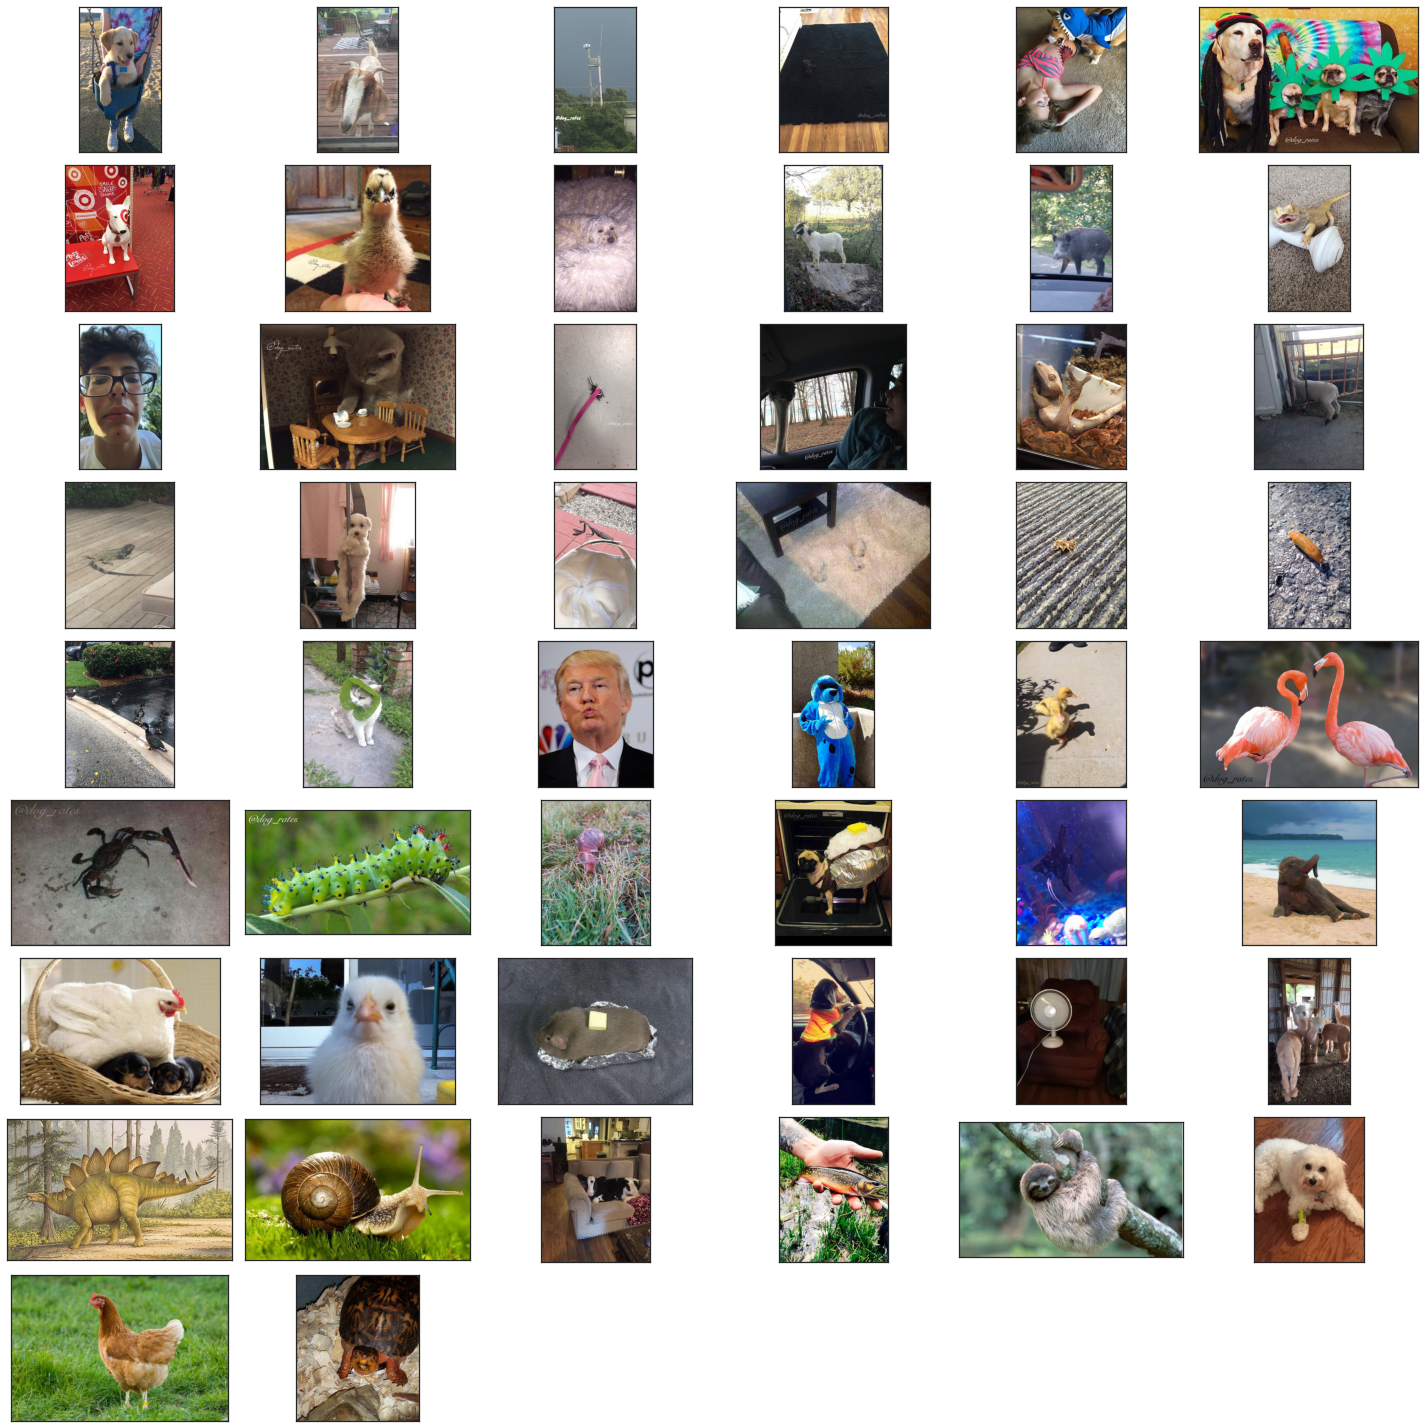

In [57]:
fig, axis = plt.subplots(figsize=(20, 20), nrows=9, ncols=6, tight_layout=True)
axis = axis.flatten()[:-4]
for i, ax in enumerate(axis):
    img_url = low_rated_dogs[i]
    img = imread(img_url, format='jpg')
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])

axis_to_delete = fig.get_axes()[50:]
for ax in axis_to_delete:
    fig.delaxes(ax)

In [58]:
# Removing images with rating less than 5 as it's for other animals or repeated posts
df_master = df_master.query('rating_numerator >= 5')

### Test

In [59]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1921 non-null   int64              
 1   in_reply_to_status_id          0 non-null      float64            
 2   in_reply_to_user_id            0 non-null      float64            
 3   timestamp                      1921 non-null   datetime64[ns, UTC]
 4   source                         1921 non-null   object             
 5   text                           1921 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1921 non-null   object             
 10  rating_numerator        

### Define
"rating denominator" has values other than 10 for picture of group of dogs and wrong values.

### Code

In [60]:
df_master.query('rating_denominator != 10')[['text', 'rating_denominator', 'expanded_urls']]

text  \
345                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
415   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
734                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
876                                After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
924                                                   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1001                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1022                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1047                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1065                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1131                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1207                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1380                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1405                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1512                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1571                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   

      rating_denominator  \
345                   70   
415                    7   
734                  150   
876                   11   
924                  170   
1001                  50   
1022                  90   
1047                  80   
1065                  50   
1131                  50   
1207                  40   
1380                 110   
1405                  11   
1512                 120   
1571                  80   

                                                                                                                                                                                                                                                        expanded_urls  
345                                                                   https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1  
415                                                                                                                                                               https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1  
734                                                              

In [61]:
denominator_not_10 = list(df_master.query('rating_denominator != 10')['jpg_url'])
len(denominator_not_10)

15

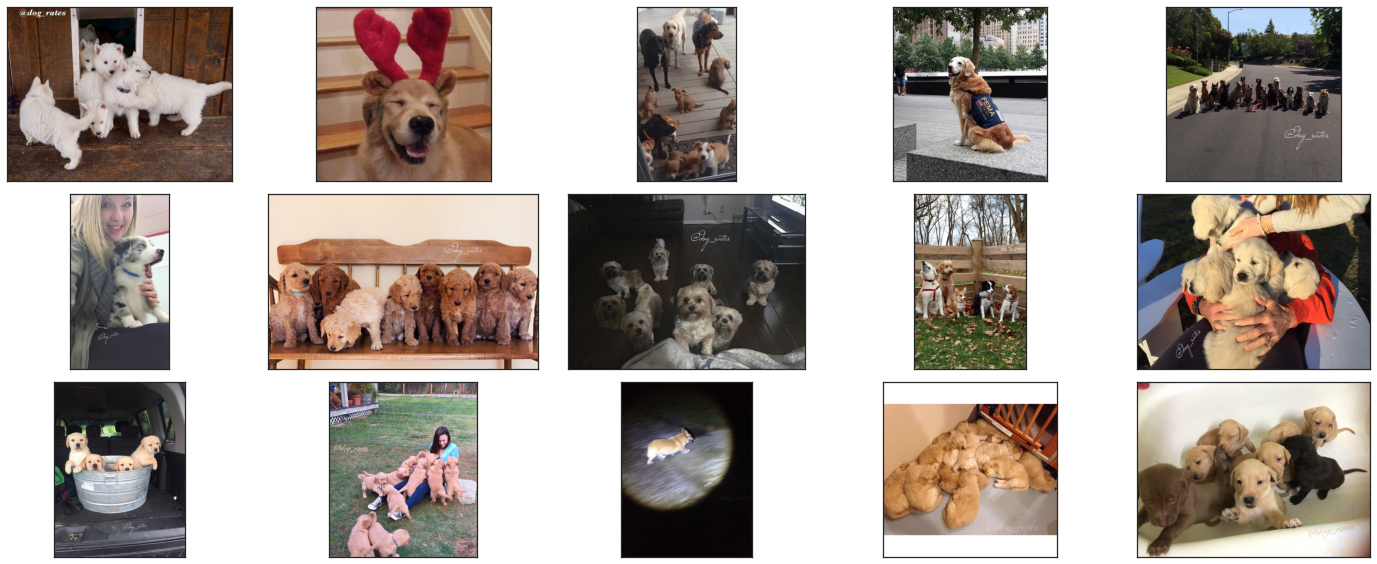

In [62]:
fig, axis = plt.subplots(figsize=(20, 8), nrows=3, ncols=5, tight_layout=True)
axis = axis.flatten()
for i, ax in enumerate(axis):
    img_url = denominator_not_10[i]
    img = imread(img_url, format='jpg')
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])

In [63]:
df_master.loc[df_master.rating_denominator >= 20, 'rating_numerator'] = \
            df_master.loc[df_master.rating_denominator >= 20, 'rating_numerator'] / \
            (df_master.loc[df_master.rating_denominator >= 20, 'rating_denominator'] / 10.)             

In [64]:
df_master.loc[df_master.rating_denominator >= 20, 'rating_denominator'] = 10

In [65]:
df_master.query('rating_denominator != 10')[['text', 'rating_denominator', 'expanded_urls']]

text  \
415   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
876                                After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1405                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   

      rating_denominator  \
415                    7   
876                   11   
1405                  11   

                                                                                                                                                                                                                                                        expanded_urls  
415                                                                                                                                                               https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1  
876   https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1  
1405                                                                                                                                                                                                  https://twitter.com/dog_rates/status/682962037429899265/photo/1

In [66]:
df_master = df_master.query('rating_denominator == 10')

### Test

In [67]:
df_master.query('rating_denominator != 10')[['text', 'rating_denominator', 'expanded_urls']]

Empty DataFrame
Columns: [text, rating_denominator, expanded_urls]
Index: []

### Define
('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') we need to select the data for best model out the 3 models.

### Code

In [68]:
# First we reset the index
df_master.reset_index(inplace=True)

In [69]:
# Lists to hold new columns values
is_dog = []
dog_breed = []
confidence = []

In [70]:
# loop over the dataframe row by row and get the data for the best model
for index, row in df_master.iterrows():
    if row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        is_dog.append(row['p1_dog'])
        dog_breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        is_dog.append(row['p2_dog'])
        dog_breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    else:
        is_dog.append(row['p3_dog'])
        dog_breed.append(row['p3'])
        confidence.append(row['p3_conf'])
        
df_master.loc[:, 'is_dog'] = is_dog
df_master.loc[:, 'breed'] = dog_breed
df_master.loc[:, 'confidence'] = confidence


### Test

In [71]:
df_master[['is_dog', 'breed', 'confidence']]

is_dog                   breed           confidence
0      False                  orange                 0.10
1       True               Chihuahua                 0.32
2       True               Chihuahua                 0.72
3      False             paper_towel                 0.17
4       True                  basset                 0.56
...      ...                     ...                  ...
1913    True      miniature_pinscher                 0.56
1914    True     Rhodesian_ridgeback                 0.41
1915    True         German_shepherd                 0.60
1916    True                 redbone                 0.51
1917    True  Welsh_springer_spaniel                 0.47

[1918 rows x 3 columns]

### Define
'doggo', 'floofer', 'pupper', 'puppo' has None instead of nans

### Code

In [72]:
stage_cols = ['doggo', 'floofer', 'pupper', 'puppo']

In [73]:
for col in stage_cols:
    df_master[col].replace('None', np.nan, inplace=True)

### Test

In [74]:
df_master[stage_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    73 non-null     object
 1   floofer  8 non-null      object
 2   pupper   208 non-null    object
 3   puppo    23 non-null     object
dtypes: object(4)
memory usage: 60.1+ KB


### Define
'doggo', 'floofer', 'pupper', 'puppo' 4 columns for only one variable

### Code

In [75]:
df_master.loc[:, 'stage'] = \
                    df_master[stage_cols].apply(lambda x: ' - '.join(x.dropna().astype(str)),axis =1)

### Test

In [76]:
df_master.stage.value_counts()

                   1616
pupper              200
doggo                63
puppo                22
doggo - pupper        8
floofer               7
doggo - puppo         1
doggo - floofer       1
Name: stage, dtype: int64

### Define
Remove unnesseccary columns

### Code

In [77]:
df_master = df_master[['tweet_id','timestamp', 'source', 'text', 'rating_numerator',
                       'rating_denominator', 'name', 'jpg_url', 'retweet_count', 
                       'favorite_count', 'lang', 'is_dog', 'breed', 'confidence', 'stage']]

### Test

In [78]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1918 non-null   int64              
 1   timestamp           1918 non-null   datetime64[ns, UTC]
 2   source              1918 non-null   object             
 3   text                1918 non-null   object             
 4   rating_numerator    1918 non-null   float64            
 5   rating_denominator  1918 non-null   int64              
 6   name                1323 non-null   object             
 7   jpg_url             1918 non-null   object             
 8   retweet_count       1918 non-null   int64              
 9   favorite_count      1918 non-null   int64              
 10  lang                1918 non-null   object             
 11  is_dog              1918 non-null   bool               
 12  breed               1918 non-null 

# Visualizations

#### Rating Numerator distribution

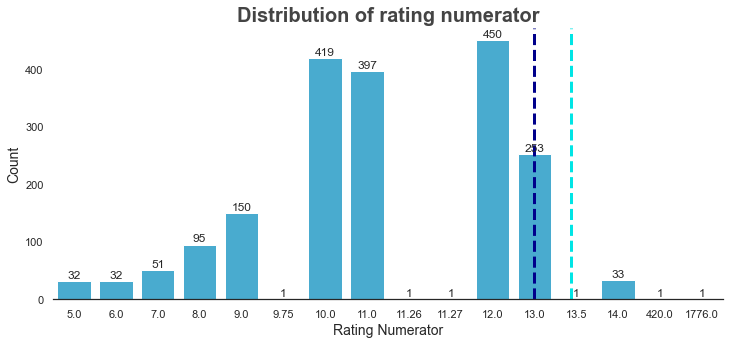

In [79]:
rating_numerator_count = df_master.rating_numerator.value_counts().sort_index()
ratings_string = [f'{x}' for x in rating_numerator_count]

plt.figure(figsize=(12, 5))
sns.countplot(data=df_master, x='rating_numerator', color=fav_color)
sns.despine(left=True)

plt.axvline(x=df_master.rating_numerator.mean(), color='#00e5e5', linewidth=3, ls='--')
plt.axvline(x=df_master.rating_numerator.median(), color='darkblue', linewidth=3, ls='--')

for i, c in enumerate(rating_numerator_count):
    plt.text(i, c+5, ratings_string[i], ha='center')
    
plt.title('Distribution of rating numerator', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#444'})
plt.ylabel('Count', fontdict={'fontsize': 14})
plt.xlabel('Rating Numerator', fontdict={'fontsize': 14});

- Rating numerator ranges from 5 to 14 and we have 2 outliers points at 420 and 1776

#### Display images for the 2 outliers

In [80]:
outliers_images = list(df_master.query('rating_numerator > 400')['jpg_url'])
outliers_text = list(df_master.query('rating_numerator > 400')['text'])

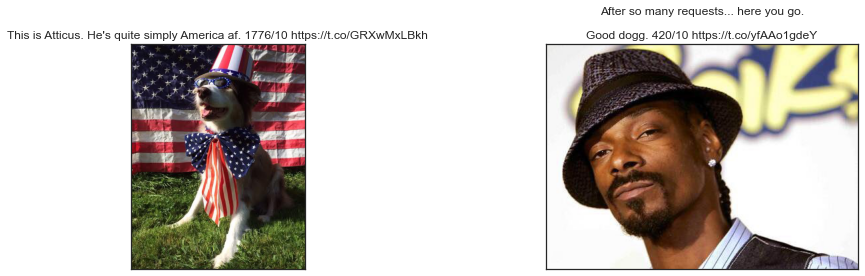

In [81]:
fig, axis = plt.subplots(figsize=(16, 4), nrows=1, ncols=2, tight_layout=True)

for i, ax in enumerate(axis):
    img_url = outliers_images[i]
    img = imread(img_url, format='jpg')
    ax.imshow(img)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(outliers_text[i])

#### Top 10 dog names

In [82]:
top10_dog_names = df_master.name.value_counts()[:10]
top10_dog_names

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Toby        7
Daisy       7
Name: name, dtype: int64

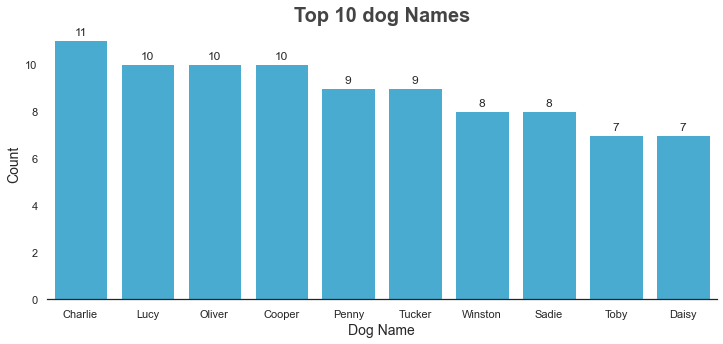

In [83]:
count_string = [f'{x}' for x in top10_dog_names]
plt.figure(figsize=(12, 5))
sns.barplot(x=top10_dog_names.index, y=top10_dog_names.values, color=fav_color)
sns.despine(left=True)
for i, c in enumerate(top10_dog_names):
    plt.text(i, c+.2, count_string[i], ha='center')
    
plt.title('Top 10 dog Names', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#444'})
plt.ylabel('Count', fontdict={'fontsize': 14})
plt.xlabel('Dog Name', fontdict={'fontsize': 14});

#### Tweets source

In [84]:
source_count = df_master.source.value_counts()

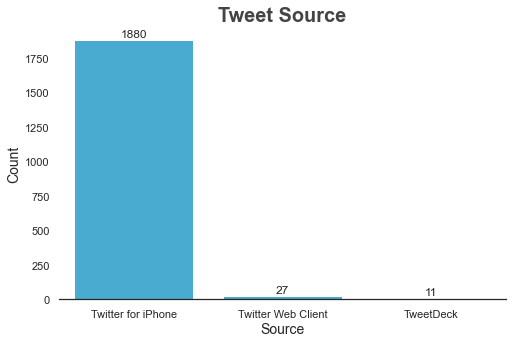

In [85]:
count_string = [f'{x}' for x in source_count]
plt.figure(figsize=(8, 5))
sns.barplot(x=source_count.index, y=source_count.values, color=fav_color)
sns.despine(left=True)
for i, c in enumerate(source_count):
    plt.text(i, c+20, count_string[i], ha='center')
    
plt.title('Tweet Source', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#444'})
plt.ylabel('Count', fontdict={'fontsize': 14})
plt.xlabel('Source', fontdict={'fontsize': 14});

### Favroits V.S. Retweents count

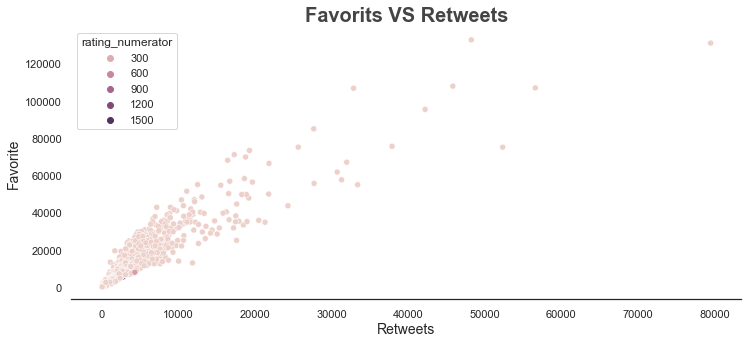

In [86]:
plt.figure(figsize=(12, 5))
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_master, hue='rating_numerator') 
sns.despine(left=True)

plt.title('Favorits VS Retweets', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#444'})
plt.ylabel('Favorite', fontdict={'fontsize': 14})
plt.xlabel('Retweets', fontdict={'fontsize': 14});

### Top 10 dog breeds

In [87]:
top10_breeds = df_master.query('is_dog == True').breed.value_counts()[:10]
top10_breeds

golden_retriever      135
Labrador_retriever     94
Pembroke               87
Chihuahua              77
pug                    53
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: breed, dtype: int64

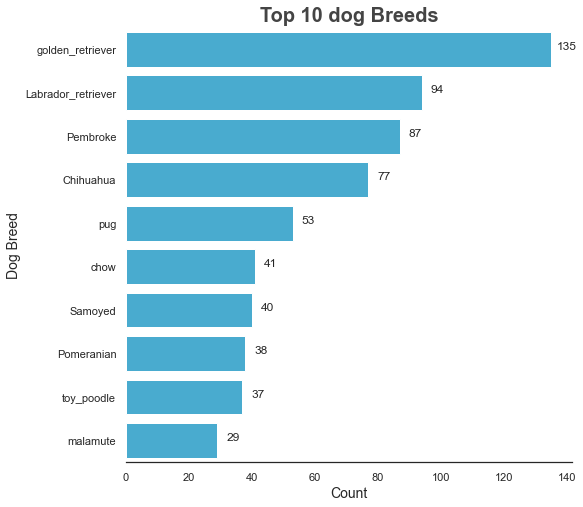

In [88]:
count_string = [f'{x}' for x in top10_breeds]
plt.figure(figsize=(8, 8))
sns.barplot(y=top10_breeds.index, x=top10_breeds.values, color=fav_color)
sns.despine(left=True)
for i, c in enumerate(top10_breeds):
    plt.text(c+5, i, count_string[i], ha='center')
    
plt.title('Top 10 dog Breeds', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#444'})
plt.xlabel('Count', fontdict={'fontsize': 14})
plt.ylabel('Dog Breed', fontdict={'fontsize': 14}, );

### Language chart 

In [89]:
lang_counts = df_master.lang.value_counts()
lang_counts

en    1911
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

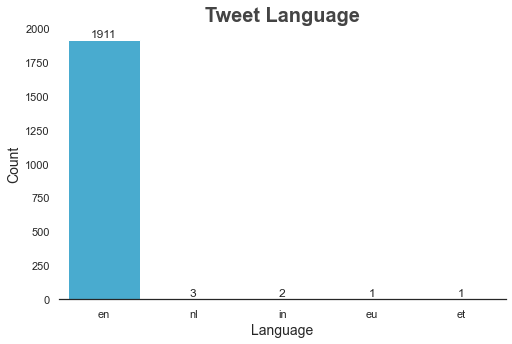

In [90]:
count_string = [f'{x}' for x in lang_counts]
plt.figure(figsize=(8, 5))
sns.barplot(x=lang_counts.index, y=lang_counts.values, color=fav_color)
sns.despine(left=True)
for i, c in enumerate(lang_counts):
    plt.text(i, c+20, count_string[i], ha='center')
    
plt.title('Tweet Language', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#444'})
plt.ylabel('Count', fontdict={'fontsize': 14})
plt.xlabel('Language', fontdict={'fontsize': 14});



## Sources

How to merge 3 or more dataframes in one step [StackOverFlow](https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns)